In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, classification_report, mean_squared_error

In [38]:
Model_PKL_MODEL = joblib.load('./PKL_Models/multiClassModel 23 Features.pkl')

- ### Importing the Binary models using Joblib files 
    - ** Note : these models were trained on the Amazon Sagemaker

### Importing the unseen dataset on which we need to perform the prediction 

In [49]:
dfe = pd.read_csv("./Files/Unseen_data_20_pure_split.csv")

In [92]:
dfe[(dfe['DE_Results']==0) & (dfe['Predicted']==1) & (dfe['StageName']==1)].shape

(1447, 42)

In [83]:
dfe[(dfe['Predicted']==0) & (dfe['StageName']==1)].shape

(3485, 42)

In [100]:
list(dfe[(dfe['DE_Results']==0) & (dfe['StageName']==1) ]['Id'])

['0062x00000DslllAAB',
 '0062x00000FJxmqAAD',
 '0062x00000DGjTrAAL',
 '0062x00000EzttKAAR',
 '0062x00000EbwCbAAJ',
 '0062x00000DXfW4AAL',
 '0062x00000FvAEYAA3',
 '0062x00000EeDzbAAF',
 '0062x00000E5Ba2AAF',
 '0062x00000DITogAAH',
 '0062x00000EMot8AAD',
 '0062x00000F1WofAAF',
 '0062x00000DXWwAAAX',
 '0062x00000DZplRAAT',
 '0062x00000DAUzlAAH',
 '0062x00000DAO6uAAH',
 '0062x00000E3giBAAR',
 '0062x00000DACP6AAP',
 '0062x00000DXS0UAAX',
 '0062x00000DrRbPAAV',
 '0062x00000EbXrwAAF',
 '0062x00000FJulaAAD',
 '0062x00000EyZzmAAF',
 '0062x00000EeXJKAA3',
 '0062x00000FUFKzAAP',
 '0062x00000EbnonAAB',
 '0062x00000DVUEiAAP',
 '0062x00000DH3W8AAL',
 '0062x00000E4nEbAAJ',
 '0062x00000DA500AAD',
 '0062x00000DYHG7AAP',
 '0062x00000DWRVCAA5',
 '0062x00000EwGVeAAN',
 '0062x00000FV3o2AAD',
 '0062x00000D1vvqAAB',
 '0062x00000E4wVmAAJ',
 '0062x00000DZaopAAD',
 '0062x00000DIg3EAAT',
 '0062x00000ExVsXAAV',
 '0062x00000FVylFAAT',
 '0062x00000F1V2OAAV',
 '0062x00000DVw9TAAT',
 '0062x00000DFCXNAA5',
 '0062x0000

In [110]:
dfe[(dfe['State'] =="NT")& (dfe['StageName']==0) ] 

,Id,AccountId,City,State,Country,Applicant_Type__c,Deposit_spent_on_DOD__c,Monthly_ongoing_financial_commitments__c,DP_Primary_income_frequency__c,DP_enders_with_uncleared_dishonours_233__c,...,CloseDate,Bank_Report_Gov_Benefit__c,Loan_apply_date,DE_Results,DP_Total_Monthly_Benefit_Income__c,Total_monthly_credits__c,Summary_Income_BS__c,dishonoursFound_Created,StageName,Predicted
1,0062x00000EerOYAAZ,0012x00000fmcLPAAY,Driver,NT,Australia,0,61.64,750.5179,2.0,0.0,...,15-09-2023,False,2023-09-15,0,0.0,2486.0,2271.70,0.06,0,0
69,0062x00000D7c99AAB,0012x00000KMht0AAD,Wallace Rockhole,NT,Australia,1,75.60,89.2060,4.0,0.0,...,17-01-2023,False,2023-01-16,1,681.0,6007.0,1651.26,0.00,0,1
94,0062x00000DZ1pfAAD,0012x00000gpBAPAA2,Fannie Bay,NT,Australia,0,86.32,1522.0955,2.0,0.0,...,15-04-2023,False,2023-04-15,0,53.0,6835.0,5514.07,0.00,0,0
99,0062x00000EeNNQAA3,0012x00000gomqWAAQ,Parap,NT,Australia,0,73.83,1110.9432,2.0,0.0,...,12-09-2023,False,2023-09-12,0,0.0,6830.0,4813.18,0.00,0,0
239,0062x00000E53ueAAB,0012x00000fmXkUAAU,Sadadeen,NT,Australia,0,53.11,328.6198,2.0,1.0,...,15-06-2023,False,2023-06-15,0,0.0,4175.0,3540.02,0.33,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,0062x00000DHjCdAAL,0010K00001c9Tb4QAE,Woodroffe,NT,Australia,0,70.97,3785.0848,2.0,0.0,...,03-03-2023,False,2023-03-03,0,958.0,9167.0,8710.89,0.02,0,0
16474,0062x00000DJ0T2AAL,0012x00000WqXxkAAF,Gillen,NT,Australia,0,65.23,408.0000,3.0,0.0,...,15-03-2023,False,2023-03-15,0,0.0,7609.0,4921.67,0.00,0,0
16516,0062x00000E59bWAAR,0012x00000Zuj8CAAR,NOCKATUOCKNOCKATNOCKANOCKATUOCKNOC,NT,Australia,0,92.68,594.5119,4.0,1.0,...,16-06-2023,False,2023-06-16,1,671.0,4104.0,3662.71,0.56,0,0
16562,0062x00000FWCc8AAH,0012x00000WqsKnAAJ,Moulden,NT,Australia,0,79.63,1557.8495,4.0,0.0,...,27-12-2023,True,2023-12-27,1,4599.0,7222.0,6748.15,0.07,0,0


In [ ]:
887 -> 0=386 1=541

In [50]:
dfe.columns

Index(['Id', 'AccountId', 'City', 'State', 'Country', 'Applicant_Type__c',
       'Deposit_spent_on_DOD__c', 'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c', 'Amount',
       'Payment_Frequency__c', 'Summary_Income_CV__c', 'Amount_Requested__c',
       'Dishonours_203__c', 'DP_Days_in_Overdrawn_For_Period__c',
       'Dishonours_For_Last_30_Days_DP907__c',
       'Salary_Gov_Allowances_all_types_2117__c',
       'DP_Monthly_avg_of_SACC_repa

In [51]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33501 entries, 0 to 33500
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Id                                          33501 non-null  object 
 1   AccountId                                   33501 non-null  object 
 2   City                                        33501 non-null  object 
 3   State                                       33501 non-null  object 
 4   Country                                     33501 non-null  object 
 5   Applicant_Type__c                           33501 non-null  int64  
 6   Deposit_spent_on_DOD__c                     33501 non-null  float64
 7   Monthly_ongoing_financial_commitments__c    33501 non-null  float64
 8   DP_Primary_income_frequency__c              33501 non-null  float64
 9   DP_enders_with_uncleared_dishonours_233__c  33501 non-null  float64
 10  Largest_in

In [52]:
dfe.columns

Index(['Id', 'AccountId', 'City', 'State', 'Country', 'Applicant_Type__c',
       'Deposit_spent_on_DOD__c', 'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c', 'Amount',
       'Payment_Frequency__c', 'Summary_Income_CV__c', 'Amount_Requested__c',
       'Dishonours_203__c', 'DP_Days_in_Overdrawn_For_Period__c',
       'Dishonours_For_Last_30_Days_DP907__c',
       'Salary_Gov_Allowances_all_types_2117__c',
       'DP_Monthly_avg_of_SACC_repa

In [53]:
dfe['Bank_Report_Gov_Benefit__c']

0        False
1        False
2        False
3        False
4        False
         ...  
33496    False
33497    False
33498     True
33499     True
33500     True
Name: Bank_Report_Gov_Benefit__c, Length: 33501, dtype: bool

In [54]:
dfe.shape

(33501, 41)

#### Checking the stagename count for each stage like Green, Orange, Red

In [55]:
dfe['StageName'].value_counts()

StageName
1    16850
0    16651
Name: count, dtype: int64

In [56]:
dfe['DE_Results'].value_counts()

DE_Results
2    12994
0    11405
1     9102
Name: count, dtype: int64

#### Removing the unnecessaly columns Actually these features were not used at the time of training of Model.

In [57]:
X = dfe.drop(['StageName','Id', 'AccountId',  'City',  'State', 'DP_No_Direct_Debits_On_Primary_Acct_355__c','DP_Dishonours_Across_Primary_Acct_244__c', 'Country', 'Amount', 'Summary_Income_BS__c', 'Summary_Income_CV__c', 'loan_dishonours__c', 'CloseDate', 'Bank_Report_Gov_Benefit__c', 'Loan_apply_date', 'DE_Results', 'DP_Avg_Monthly_Loan_Liability_269__c', 'Opp_Number__c'], axis=1)
y = dfe['StageName'].values

In [58]:
dfe["Predicted"] = Model_PKL_MODEL.predict(X)

In [59]:
ac = accuracy_score(dfe["StageName"],dfe["Predicted"])
print('Accuracy is: ',ac)
# Accuracy is:  0.7082599065526328

Accuracy is:  0.857795289692845


In [60]:
"Accurracy of DE is", accuracy_score(dfe["StageName"],dfe['DE_Results'])

('Accurracy of DE is', 0.4121668009910152)

In [61]:
X['Predicted'] =  Model_PKL_MODEL.predict(X)

<Axes: >

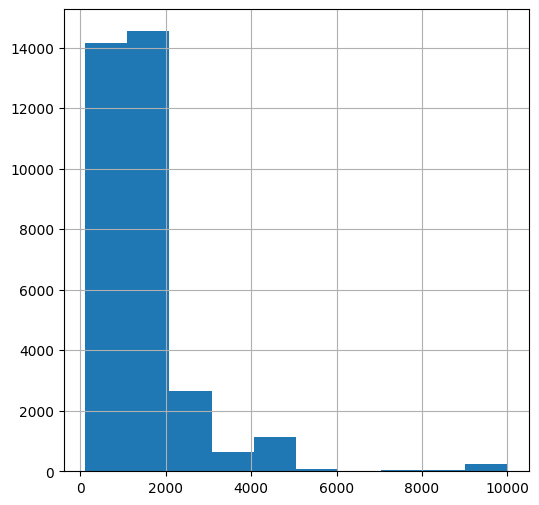

In [62]:
dfe['Amount'].hist(figsize=[6,6])

In [63]:
dfe.shape

(33501, 42)

## now Calculating the prediction probability of the Binary Model for the predicted Class

In [64]:
def obtain_binary_probability_Score_Green(row):
    reshaped_value = row.to_frame().transpose()
    print(reshaped_value)
    preidcteValue =  reshaped_value['Predicted'].values[0]
    reshaped_value.drop(['Predicted'],inplace=True, axis=1)
    predicted_probal_green = Model_PKL_MODEL.predict_proba(reshaped_value)
    # print("preidcteValue :> ",preidcteValue)
    # print(predicted_probal_green)
    return predicted_probal_green[:, preidcteValue][0]


# def obtain_binary_probability_Score_Orange(row):
#     reshaped_value = row.to_frame().transpose()
#     predicted_result_orange =  Binary_PKL_MODEL_ORANGE.predict(reshaped_value)
#     predicted_probal_orange = Binary_PKL_MODEL_ORANGE.predict_proba(reshaped_value)
#     result_o = predicted_result_orange[0] 
#     return predicted_probal_orange[:, result_o][0]

# def obtain_binary_probability_Score_Red(row):
#     reshaped_value = row.to_frame().transpose()
#     predicted_result_red =  Binary_PKL_MODEL_RED.predict(reshaped_value)
#     predicted_probal_red = Binary_PKL_MODEL_RED.predict_proba(reshaped_value)
#     result_r = predicted_result_red[0] 
#     return predicted_probal_red[:, result_r][0]

In [156]:
dfe["prediction_probability"] = X[:10].apply(obtain_binary_probability_Score_Green,axis=1)    

In [143]:
check = solo.apply(obtain_binary_probability_Score_Green,axis=1)    

preidcteValue :>  0
[[0.52 0.48]]
preidcteValue :>  0
[[0.57 0.43]]
preidcteValue :>  0
[[0.58 0.42]]
preidcteValue :>  0
[[0.94 0.06]]
preidcteValue :>  0
[[0.71 0.29]]
preidcteValue :>  0
[[0.7 0.3]]
preidcteValue :>  0
[[0.53 0.47]]
preidcteValue :>  0
[[0.84 0.16]]
preidcteValue :>  0
[[0.69 0.31]]
preidcteValue :>  0
[[0.68 0.32]]
preidcteValue :>  0
[[0.53 0.47]]
preidcteValue :>  0
[[0.63 0.37]]
preidcteValue :>  0
[[0.51 0.49]]
preidcteValue :>  0
[[0.79 0.21]]
preidcteValue :>  0
[[0.89 0.11]]
preidcteValue :>  0
[[0.66 0.34]]
preidcteValue :>  0
[[0.71 0.29]]
preidcteValue :>  0
[[0.69 0.31]]
preidcteValue :>  0
[[0.83 0.17]]
preidcteValue :>  0
[[0.56 0.44]]
preidcteValue :>  0
[[0.8 0.2]]
preidcteValue :>  0
[[0.59 0.41]]
preidcteValue :>  0
[[0.91 0.09]]
preidcteValue :>  0
[[0.98500351 0.01499649]]
preidcteValue :>  0
[[0.52 0.48]]
preidcteValue :>  0
[[0.88 0.12]]
preidcteValue :>  0
[[0.83 0.17]]
preidcteValue :>  0
[[0.89 0.11]]
preidcteValue :>  0
[[0.67 0.33]]
preidc

In [132]:
sahi_sahi = dfe[(dfe['Predicted']==0) & (dfe['StageName']==0)]

In [151]:
checl = sahi_sahi[sahi_sahi['Amount']<=2000].apply(obtain_binary_probability_Score_Green,axis=1)   

preidcteValue :>  0
[[0.7 0.3]]
preidcteValue :>  0
[[0.94 0.06]]
preidcteValue :>  0
[[0.9 0.1]]
preidcteValue :>  0
[[0.78 0.22]]
preidcteValue :>  0
[[0.95 0.05]]
preidcteValue :>  0
[[0.99 0.01]]
preidcteValue :>  0
[[0.93 0.07]]
preidcteValue :>  0
[[0.93 0.07]]
preidcteValue :>  0
[[0.83 0.17]]
preidcteValue :>  0
[[0.93 0.07]]
preidcteValue :>  0
[[0.91 0.09]]
preidcteValue :>  0
[[0.65 0.35]]
preidcteValue :>  0
[[0.77 0.23]]
preidcteValue :>  0
[[0.57 0.43]]
preidcteValue :>  0
[[0.78 0.22]]
preidcteValue :>  0
[[0.58 0.42]]
preidcteValue :>  0
[[0.95 0.05]]
preidcteValue :>  0
[[0.78 0.22]]
preidcteValue :>  0
[[0.74 0.26]]
preidcteValue :>  0
[[0.78 0.22]]
preidcteValue :>  0
[[0.95 0.05]]
preidcteValue :>  0
[[0.96 0.04]]
preidcteValue :>  0
[[0.8 0.2]]
preidcteValue :>  0
[[0.57 0.43]]
preidcteValue :>  0
[[0.91 0.09]]
preidcteValue :>  0
[[0.96 0.04]]
preidcteValue :>  0
[[0.66 0.34]]
preidcteValue :>  0
[[0.85 0.15]]
preidcteValue :>  0
[[0.68 0.32]]
preidcteValue :>  0


In [153]:
count = 0
for i in checl:
    if i < 0.60:
        count+=1

count

460

In [155]:
len(checl)

5537

In [ ]:
Galat = 410/2048
Shi kitna galat hue = 578/11825

In [149]:
578/11825

0.04887949260042283

In [150]:
460/  #410/2048 

0.2001953125

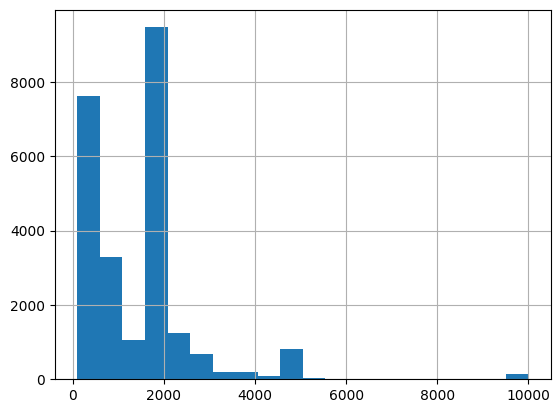

In [108]:
names = dfe['Amount']
values = dfe['Amount']

# mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# # the histogram of the data
plt.hist(dfe['Amount'], bins=20)
plt.grid(True)
plt.show()

### Eveluating the results of model to Calculate the Gains and Loss of Our Model

In [29]:
import matplotlib.pyplot as plt


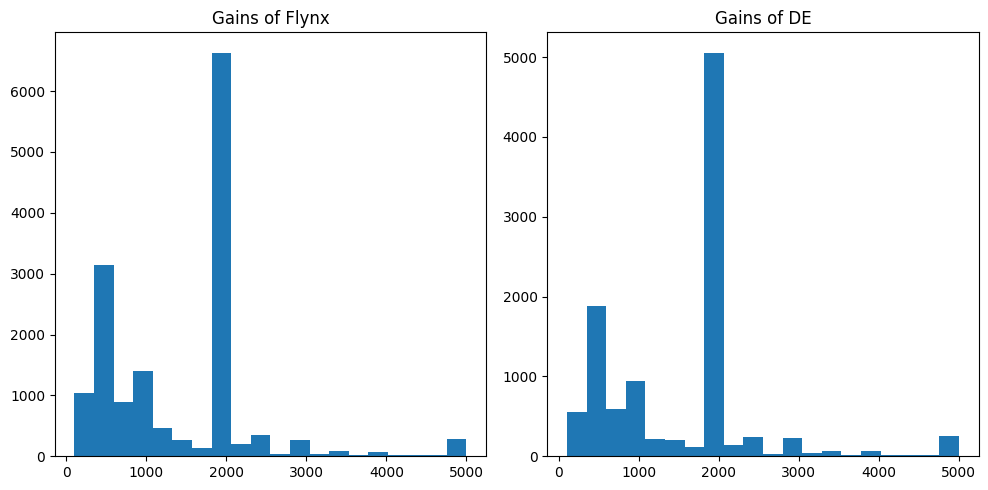

In [65]:
# Create subplots
plt.figure(figsize=(10, 5))

# First pie chart
plt.subplot(1, 2, 1)
plt.hist(dfe[(dfe['Predicted']==0) & (dfe['StageName']==0)]['Amount'], bins=20)
plt.title('Gains of Flynx')

# Second pie chart
plt.subplot(1, 2, 2)
plt.hist(dfe[(dfe['DE_Results']==0) & (dfe['StageName']==0)]['Amount'], bins=20)
plt.title('Gains of DE')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

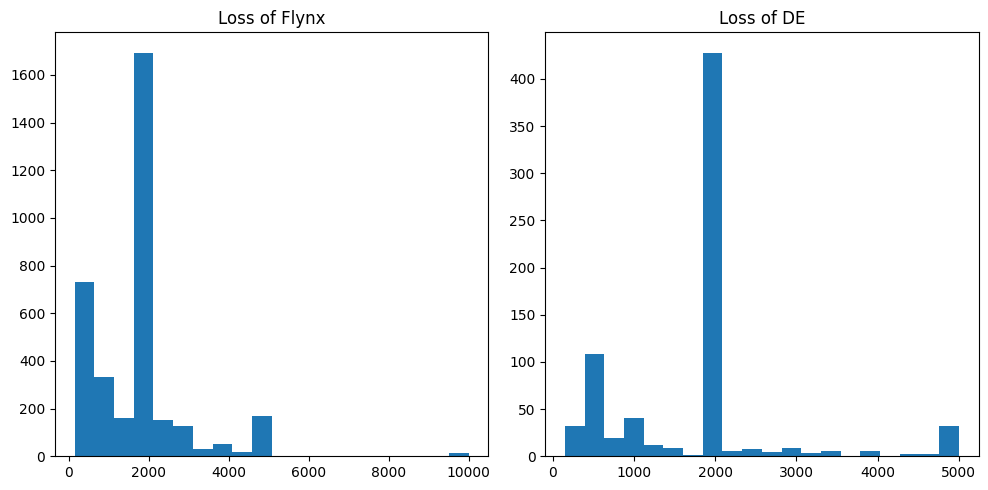

In [66]:
# Create subplots
plt.figure(figsize=(10, 5))

# First pie chart
plt.subplot(1, 2, 1)
plt.hist(dfe[(dfe['Predicted']==0) & (dfe['StageName']==1)]['Amount'], bins=20)
plt.title('Loss of Flynx')

# Second pie chart
plt.subplot(1, 2, 2)
plt.hist(dfe[(dfe['DE_Results']==0) & (dfe['StageName']==1)]['Amount'], bins=20)
plt.title('Loss of DE')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [67]:
# ('Gains of Flynx', 18559850) with out any probablity
"Gains of Flynx",sum(dfe[(dfe['Predicted']==0) & (dfe['StageName']==0)]['Amount'])

('Gains of Flynx', 23157650)

In [68]:
"Gains of DE",sum(dfe[(dfe['DE_Results']==0) & (dfe['StageName']==0)]['Amount'])

('Gains of DE', 17253350)

In [69]:
# ('Losses of Flynx', 3124350) With any probablity
"Losses of Flynx",sum(dfe[(dfe['Predicted']==0) & (dfe['StageName']==1) & (dfe['Amount']<=5000)]['Amount'])

('Losses of Flynx', 6280550)

In [70]:
"Losses of DE",sum(dfe[(dfe['DE_Results']==0) & (dfe['StageName']==1)]['Amount'])

('Losses of DE', 1330700)

In [72]:
"Gains of DE which were not been predicted by DE",sum(dfe[(dfe['DE_Results']==1) & (dfe['StageName']==0)]['Amount'])

('Gains of DE which were not been predicted by DE', 6958700)

In [208]:
tempDf.to_csv("./Files/Check/Wrong_Results.csv",index=False)

In [202]:
dfu = pd.read_csv("./Files/Check/DF_LoanDataSet_version_1.csv")

C:\Users\ritik\AppData\Local\Temp\ipykernel_27376\626495556.py:1: DtypeWarning: Columns (17,45,59) have mixed types. Specify dtype option on import or set low_memory=False.
  dfu = pd.read_csv("./Files/Check/DF_LoanDataSet_version_1.csv")


In [205]:
dhui.columns

Index(['Id', 'Decision_Engine_Repeat_Loans_Status__c',
       'Decision_Engine_V3_Status__c', 'Decline_Notification__c', 'CloseDate'],
      dtype='object')

In [204]:
dhui = dfu[['Id', 'Decision_Engine_Repeat_Loans_Status__c',
       'Decision_Engine_V3_Status__c', 'Decline_Notification__c', 'CloseDate',]]

In [209]:
solve = tempDf.merge(dhui,on="Id")

In [215]:
solve.to_csv("./Files/Check/WrongRealData.csv",index="False")

In [212]:
tech = dfe[(dfe['Predicted']==0) & (dfe['StageName']==0)]

In [213]:
solvetech = tech.merge(dhui,on="Id")

In [214]:
solvetech.to_csv("./Files/Check/SolveRealData.csv",index=False)

In [85]:
solo = dfe[(dfe['Predicted']==0) & (dfe['StageName']==1)]

In [118]:
sum(solo[solo['Amount']==2000]['Amount'])

102000

In [ ]:
70% Model
Gain FLynx -> 2,28,97,050
LOSS FLynx -> 28,46,600

Gain DE Engine -> 1,84,69,450
LOSS DE Engine -> 11,96,700

In [ ]:
75% Model
Gain FLynx -> 1,48,92,100 
Gain DE Engine -> 1,84,69,450

LOSS FLynx -> 16,76,600
LOSS DE Engine -> 11,96,700

In [ ]:
85% Model
Gain FLynx -> 49,05,750
Gain DE Engine -> 1,84,69,450

LOSS Flynx -> 4,62,100
LOSS DE Engine -> 11,96,700

In [34]:
dfe.columns

Index(['Id', 'DP_Total_Monthly_Benefit_Income__c', 'Total_monthly_credits__c',
       'Summary_Income_BS__c', 'AccountId', 'City', 'State', 'Country',
       'StageName', 'Applicant_Type__c', 'Deposit_spent_on_DOD__c',
       'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c', 'Payment_Frequency__c',
       'Summary_Income_CV__c', 'Amount_Requested__c', 'Dishonours_203__c',
       'DP_Days_in_Overdrawn_For_Period__c',
       'Dishonours_For_La

### Now Calculating the final Prediction from the combination of multiclass and Binary Results

In [89]:
def obtain_binary_result(row):
    reshaped_value = row.to_frame().transpose()
    predictedProbab = reshaped_value['predict_probability'].values[0]
    predictedValue = reshaped_value['Predicted'].values[0]
    if predictedValue != 0:
        return predictedValue
    DeltaThreshold,GlobalThreshold = 0.03,0.6
    
    bin_prob_0, bin_prob_1, bin_prob_2 = reshaped_value['Green_Binary_Probability'].values[0],reshaped_value['Orange_Binary_Probability'].values[0],reshaped_value['Red_Binary_Probability'].values[0]
    if predictedProbab>=GlobalThreshold:

        prob_diff_G_R,prob_diff_G_O = abs(bin_prob_0-bin_prob_2), abs(bin_prob_0-bin_prob_1)
        if prob_diff_G_R < prob_diff_G_O :
            if prob_diff_G_R < DeltaThreshold:
                return 2
            else:
                if bin_prob_2 >bin_prob_0:
                    return 2
                else:
                    return 0
        else:
            if prob_diff_G_O <  DeltaThreshold:
                return 1
            else:
                if bin_prob_1>bin_prob_0:
                    return 1
                else:
                    return 0
    else:
        if predictedProbab<GlobalThreshold:
            if bin_prob_1>bin_prob_2:
                return 1
            else:
                return 2

In [90]:
dfe['Final_predicted_variation'] = dfe.apply(obtain_binary_result,axis=1)

In [91]:
dfe['Final_predicted_variation'] = dfe['Final_predicted_variation'].astype(int)

In [92]:
dfe['Diff_Green_Red'] = dfe['Green_Binary_Probability'] - dfe['Red_Binary_Probability']

In [93]:
dfe['Diff_Green_Orange'] = dfe['Green_Binary_Probability'] - dfe['Orange_Binary_Probability']

In [94]:
dfe['Diff_Green_Red'] = abs(dfe['Diff_Green_Red'])

In [95]:
dfe['Diff_Green_Orange'] = abs(dfe['Diff_Green_Orange'])

<Axes: >

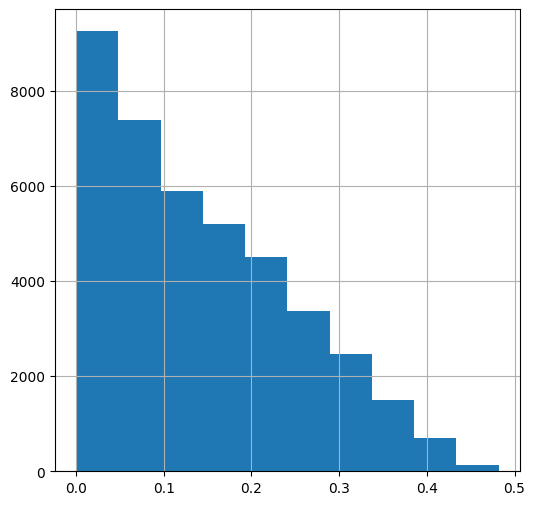

In [100]:
dfe[dfe['predict_probability'] >=0.7 ]['Diff_Green_Red'].hist(figsize=(6,6))

<Axes: >

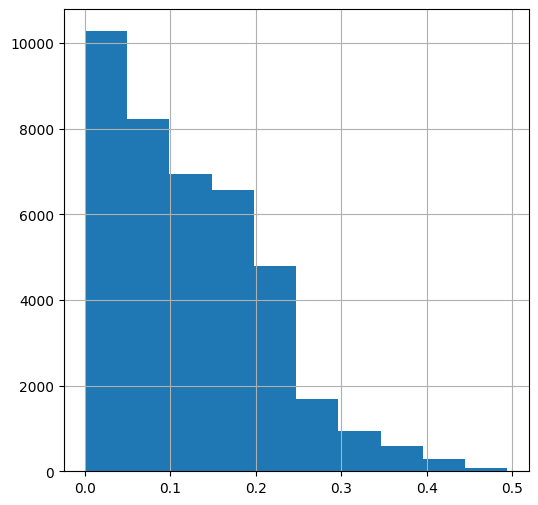

In [101]:
dfe[dfe['predict_probability'] >=0.7 ]['Diff_Green_Orange'].hist(figsize=(6,6))

In [41]:
dfe.head(10)

,Id,DP_Total_Monthly_Benefit_Income__c,Total_monthly_credits__c,Summary_Income_BS__c,AccountId,City,State,Country,StageName,Applicant_Type__c,...,DE_Results,Predicted,predict_probability,Green_Binary_Predicted,Orange_Binary_Predicted,Red_Binary_Predicted,Green_Binary_Probability,Orange_Binary_Probability,Red_Binary_Probability,Final_predicted
0,0062x00000E6wToAAJ,0.0,25283.0,19675.89,0012x00000hYJlKAAW,Banyo,QLD,Australia,0,0,...,1,1,0.735534,1,1,0,0.526245,0.735534,0.84,1
1,0062x00000E6wGlAAJ,13.0,7615.0,6989.35,0012x000005UPkQAAW,Rosebud,VIC,Australia,0,0,...,1,1,0.647493,0,1,0,0.643047,0.647493,0.80,1
2,0062x00000E6wKXAAZ,0.0,8516.0,7686.59,0012x00000fm2suAAA,HASSALL GROVE,NSW,Australia,0,0,...,1,0,0.453387,0,1,0,0.546613,0.622742,0.86,2
3,0062x00000E6wG1AAJ,0.0,5290.0,4798.16,0012x00000e0RWhAAM,WALGETT,NSW,Australia,0,0,...,0,1,0.666116,1,1,0,0.646044,0.666116,0.77,1
4,0062x00000E6vgnAAB,0.0,7138.0,7380.65,0012x00000RrG8HAAV,Piccadilly,WA,Australia,0,0,...,1,1,0.724416,1,1,0,0.608462,0.724416,0.85,1
5,0062x00000E6w82AAB,0.0,6538.0,6002.69,0012x000003EkGYAA0,Narellan Vale,NSW,Australia,0,0,...,0,1,0.609611,0,1,0,0.523741,0.609611,0.82,1
6,0062x00000E6w1fAAB,0.0,7539.0,7569.39,0012x00000IMXgtAAH,South Morang,VIC,Australia,0,0,...,0,1,0.534912,1,1,0,0.614043,0.534912,0.69,1
7,0062x00000E6vspAAB,786.0,6939.0,7256.96,0012x00000gmzqsAAA,Hampton Park,VIC,Australia,0,0,...,0,1,0.765536,1,1,0,0.506782,0.765536,0.85,1
8,0062x00000E6vxsAAB,0.0,4983.0,2036.85,0012x00000INaIVAA1,Thomastown,VIC,Australia,0,0,...,0,1,0.587239,1,1,0,0.567581,0.587239,0.74,1
9,0062x00000E6vraAAB,90.0,11599.0,10835.78,0012x00000gpYTbAAM,Reservoir,VIC,Australia,0,0,...,1,1,0.572262,1,1,0,0.504861,0.572262,0.60,1


In [77]:
acF = accuracy_score(dfe["StageName"],dfe["Final_predicted"])
print('Accuracy with final predicted is : ',acF)
# Accuracy is:  0.7082599065526328

Accuracy with final predicted is :  0.39457726017818606


In [33]:
dfe.columns

Index(['Id', 'City', 'State', 'Country', 'StageName', 'Applicant_Type__c',
       'income_as_a_of_DP200_income__c', 'Deposit_spent_on_DOD__c',
       'DP_Monthly_avg_of_SACC_repayments__c',
       'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Primary_regular_benefit_frequency__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'Total_monthly_income_ongoin_Reg_231__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c',
       'Income_source_is_other_income_549__c', 'Summary_Income__c',
       'Summary_Expenses__c', 'Ren

In [34]:
X = dfe.drop(['Id', 'City', 'State', 'Country','StageName','Summary_Total__c', 'CloseDate', 'Loan_apply_date', 'DE_Results', 'Predicted', 'predict_probability', 'Final_predicted'],axis=1)

In [37]:
dfe.shape  

(77171, 52)

In [38]:
dfe.columns

Index(['Id', 'City', 'State', 'Country', 'StageName', 'Applicant_Type__c',
       'income_as_a_of_DP200_income__c', 'Deposit_spent_on_DOD__c',
       'DP_Monthly_avg_of_SACC_repayments__c',
       'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Primary_regular_benefit_frequency__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'Total_monthly_income_ongoin_Reg_231__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c',
       'Income_source_is_other_income_549__c', 'Summary_Income__c',
       'Summary_Expenses__c', 'Ren

In [39]:
# Define the desired column order
desired_order = ['Id', 'City', 'State', 'Country', 'Applicant_Type__c',
       'income_as_a_of_DP200_income__c', 'Deposit_spent_on_DOD__c',
       'DP_Monthly_avg_of_SACC_repayments__c',
       'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Primary_regular_benefit_frequency__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'Total_monthly_income_ongoin_Reg_231__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c',
       'Income_source_is_other_income_549__c', 'Summary_Income__c',
       'Summary_Expenses__c', 'Rent_Mortgage__c', 'Summary_Total__c',
       'Total_Repayment_Amount__c', 'Total_Repayments__c',
       'Term_in_Weeks__c', 'Payment_Frequency__c', 'Applicant_Age__c',
       'Summary_Income_CV__c', 'CloseDate', 'Amount_Requested__c',
       'Employment_Status__c', 'Dishonours_203__c',
       'DP_Insolvency_Indicator__c', 'DP_Days_in_Overdrawn_For_Period__c',
       'Dishonours_For_Last_30_Days_DP907__c','Green_Binary_Probability', 'Orange_Binary_Probability',
       'Red_Binary_Probability', 'Salary_Gov_Allowances_all_types_2117__c', 'Loan_apply_date',
       'Predicted',  'predict_probability',
        'DE_Results', 'StageName', 'Final_predicted', 'Loan_Amount__c']

# Reorder the columns
df = dfe.loc[:, desired_order]


In [40]:
df.head(20)

,Id,City,State,Country,Applicant_Type__c,income_as_a_of_DP200_income__c,Deposit_spent_on_DOD__c,DP_Monthly_avg_of_SACC_repayments__c,Monthly_ongoing_financial_commitments__c,DP_Primary_income_frequency__c,...,Orange_Binary_Probability,Red_Binary_Probability,Salary_Gov_Allowances_all_types_2117__c,Loan_apply_date,Predicted,predict_probability,DE_Results,StageName,Final_predicted,Loan_Amount__c
0,0062x00000GBxNYAA1,Rocky Point,QLD,Australia,0,0.00,65.08,384,1543.0844,1,...,0.596921,0.596921,3940.5066,2024-04-04,0,0.675411,0,0,2,400
1,0062x00000GBj14AAD,Springvale,VIC,Australia,0,0.00,94.34,327,127.7500,1,...,0.760778,0.760778,3681.9166,2024-04-03,0,0.689338,1,0,1,500
2,0062x00000GBa1uAAD,Seven Hills,NSW,Australia,0,0.00,99.59,0,0.0000,2,...,0.517170,0.517170,0.0000,2024-04-02,0,0.675912,0,0,2,1000
3,0062x00000GH0EWAA1,Andergrove,QLD,Australia,0,12.20,52.07,442,1975.7933,1,...,0.612081,0.612081,4873.8700,2024-04-01,0,0.661772,0,0,2,2050
4,0062x00000GGyhIAAT,Binnaway,NSW,Australia,0,0.00,43.79,2408,0.0000,4,...,0.728256,0.728256,0.0000,2024-04-01,0,0.071963,1,0,1,2050
5,0062x00000GGtSEAA1,Caringbah,NSW,Australia,0,0.00,61.20,1011,4289.4521,1,...,0.634213,0.634213,8102.0933,2024-03-31,0,0.265073,2,0,2,2250
6,0062x00000GGnU9AAL,Knoxfield,VIC,Australia,0,11.07,56.84,871,846.5899,1,...,0.741088,0.741088,5244.3766,2024-03-30,0,0.132309,0,0,1,3000
7,0062x00000GGkG9AAL,Seven Hills,NSW,Australia,0,0.00,99.38,0,0.0000,2,...,0.866726,0.866726,0.0000,2024-03-30,0,0.709754,1,0,0,1000
8,0062x00000GGhYHAA1,Gregory Hills,NSW,Australia,0,0.00,32.70,1283,256.3668,1,...,0.707338,0.707338,6883.9900,2024-03-29,0,0.097544,1,0,1,2050
9,0062x00000GGUocAAH,Wantirna South,VIC,Australia,1,0.00,68.88,0,491.4166,2,...,0.814011,0.814011,2666.3966,2024-03-28,0,0.702219,1,0,0,300


In [44]:
df.to_excel("./Result/MultiClass-Binary-FinalPrediction_with probability_version-2.xlsx",index=False)